In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data=pd.read_csv('C:/Users/Admin/Downloads/50_Startups1.csv')
data.head()

,R&DSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R&DSpend        50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.isna().sum()

R&DSpend          0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

# correlation matrix

In [5]:
data.corr()

,R&DSpend,Administration,MarketingSpend,Profit
R&DSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# scatterplot between variables along with histogram

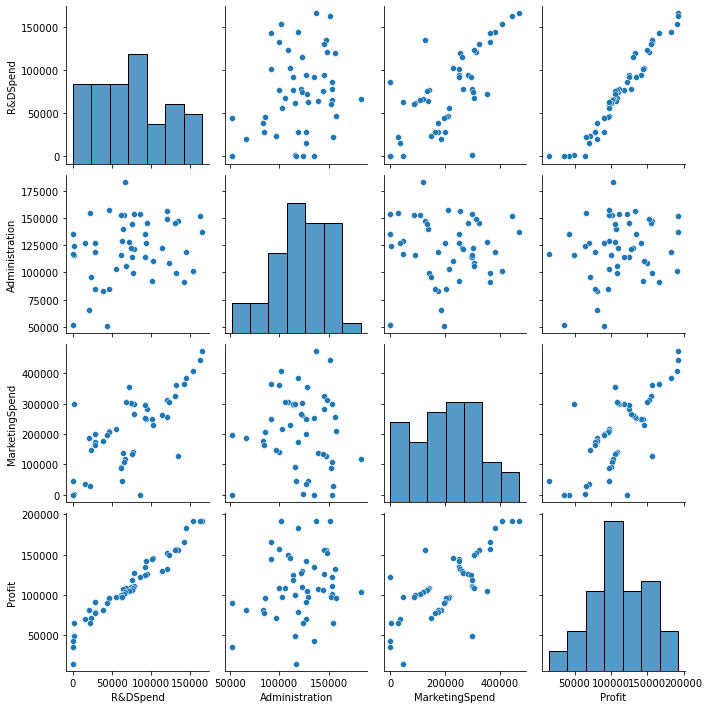

In [6]:
sns.pairplot(data)

In [21]:
data1=data.rename({'R&DSpend':'RDSpend'},axis=1)

# building model

In [24]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~RDSpend+Administration+MarketingSpend',data=data1).fit()

In [26]:
model.params

Intercept         50122.192990
RDSpend               0.805715
Administration       -0.026816
MarketingSpend        0.027228
dtype: float64

In [27]:
print(model.tvalues,'\n',model.pvalues)

Intercept          7.626218
RDSpend           17.846374
Administration    -0.525507
MarketingSpend     1.655077
dtype: float64 
 Intercept         1.057379e-09
RDSpend           2.634968e-22
Administration    6.017551e-01
MarketingSpend    1.047168e-01
dtype: float64


In [28]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# predictions

# transformation for marketing spend

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level

Text(0.5, 1.0, 'square')

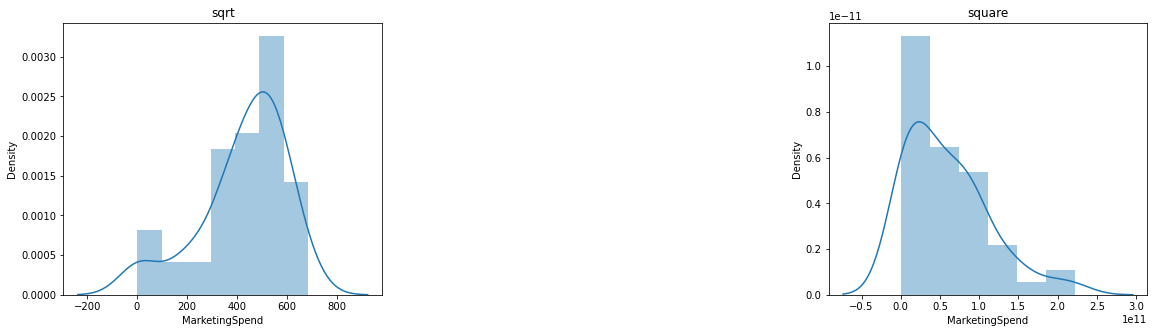

In [35]:

s = np.sqrt(data.MarketingSpend)
r = np.reciprocal(data.MarketingSpend)
sq = np.square(data.MarketingSpend)
e = np.exp(data.MarketingSpend)
p = np.poly(data.MarketingSpend)
plt.subplots(figsize=(40,5))
plt.subplot(1,6,2)
sns.distplot(s)
plt.title('sqrt')
plt.subplot(1,6,4)
sns.distplot(sq)
plt.title('square')

In [36]:
s

0     686.865416
1     666.257105
2     638.697534
3     619.031195
4     605.118517
5     602.379747
6     357.374901
7     569.101643
8     558.223333
9     552.251410
10    478.707583
11    499.744485
12    499.839414
13    502.657866
14    506.471046
15    511.640724
16    514.145952
17    531.577191
18    543.064978
19      0.000000
20    546.502031
21    547.482685
22    550.744278
23    552.058629
24    374.933074
25    371.433197
26    366.128488
27    594.292697
28    343.726926
29    327.319996
30    301.879512
31    297.015538
32    214.674754
33    463.286963
34    459.127074
35    453.340534
36    448.471649
37    443.879961
38    430.424326
39    418.329177
40    415.686986
41    405.549886
42    384.709124
43    188.505093
44    168.329201
45     43.634046
46    545.082067
47      0.000000
48      0.000000
49    212.539549
Name: MarketingSpend, dtype: float64

In [68]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~RDSpend+Administration+MarketingSpend',data=data1).fit()

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           4.53e-30
Time:                        21:29:25   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDSpend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
model.params

Intercept         50122.192990
RDSpend               0.805715
Administration       -0.026816
MarketingSpend        0.027228
dtype: float64

In [71]:
print(model.tvalues,'\n',model.pvalues)

Intercept          7.626218
RDSpend           17.846374
Administration    -0.525507
MarketingSpend     1.655077
dtype: float64 
 Intercept         1.057379e-09
RDSpend           2.634968e-22
Administration    6.017551e-01
MarketingSpend    1.047168e-01
dtype: float64


In [72]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# prediction

In [80]:
newdata=pd.DataFrame({'RDSpend':18000,'Administration':15000,'MarketingSpend':55000}, index=[0])

In [82]:
model.predict(newdata)

0    65720.367926
dtype: float64

In [83]:
profit = 52382.439251+(0.783002*18000)+(-0.022201*15000)+(0.025234*55000)
profit

67531.33025099999

In [84]:
preds = model.predict(data1)
preds

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


# RMSE

In [85]:
np.sqrt(np.mean((data1.Profit - preds)**2))

8855.34448901514

In this data "profit" is output, and remaining "R&D spend", "Administration" and "market spend" are inputs. Then, checking the outliers in the data, only output varible "profit" have only one outlier. And i have removed outlier in "profit". And "Andministration" is not following normal distribution and remaining three follows normal distribution. And by building the model on it, which is named as "model". For that model "R^2" value is 0.954 and after doing predictions on the inputs "RMSE" value is 8855.344.when compared to first model rmse value is good in second model